In [5]:
import numpy as np
import matplotlib.pyplot as plt
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
# from tensorflow.keras.regularizers import l2
# from tensorflow.keras.layers import Dropout
# from tensorflow.keras.utils import to_categorical
# from sklearn.metrics import classification_report
# from tensorflow.keras.layers import BatchNormalization

In [6]:
def create_classes(data, num_class):
    '''
    this function creates classes based on the revenue values for binary or triple-class classification
    '''
    if num_class == 2:
        data.loc[data['Revenue ( USD, Adjusted for 2024 Inflation)'] <= 50000000, 'Revenue Class'] = 0
        data.loc[data['Revenue ( USD, Adjusted for 2024 Inflation)'] > 50000000, 'Revenue Class'] = 1
    else:
        data.loc[data['Revenue ( USD, Adjusted for 2024 Inflation)'] <= 25000000, 'Revenue Class'] = 0
        data.loc[(data['Revenue ( USD, Adjusted for 2024 Inflation)'] > 25000000) & 
                 (data['Revenue ( USD, Adjusted for 2024 Inflation)'] <= 120000000), 'Revenue Class'] = 1
        data.loc[data['Revenue ( USD, Adjusted for 2024 Inflation)'] > 120000000, 'Revenue Class'] = 2
    return data

In [4]:
'''
Loading in the dataset
'''
def load_data():
    '''
    The function loads the dataset, removes rows with N/A values, selects numerical and categorical 
    columns.
    
    Input: None
    
    Output: Train and test datasets
    '''
    previous_data = pd.read_csv('IMDB_MovieListData_Normalized.csv')

    numerical_features = ['Vote Average', 
                          'Vote Count', 
                          'Runtime (mins)', 
                          'Budget (USD, Adjusted for 2024 Inflation)', 
                          'Release Year', 
                          'Popularity', 
                          'Average Rating', 
                          'IMDB Rating', 
                          'Revenue Class']

    # Creating Classes
    previous_data = create_classes(previous_data, 3)
    # Select only numerical 
    clean_data = previous_data[numerical_features]
    # Dropping NaN rows
    data = clean_data.dropna()
    

    # Setting Data and Target variables
    X = data.drop(columns=['Revenue Class'])
    y = data['Revenue Class'] 
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    train_test_sets = {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test
    }
    print(train_test_sets)

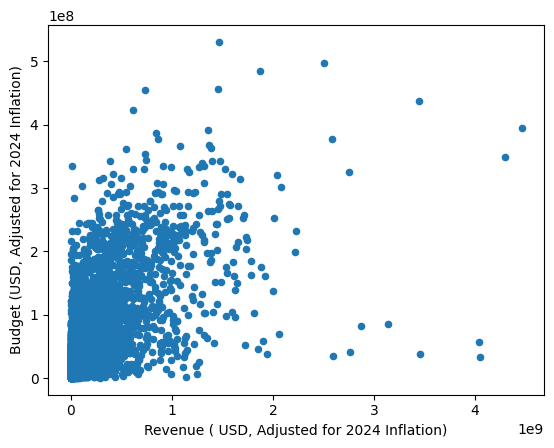

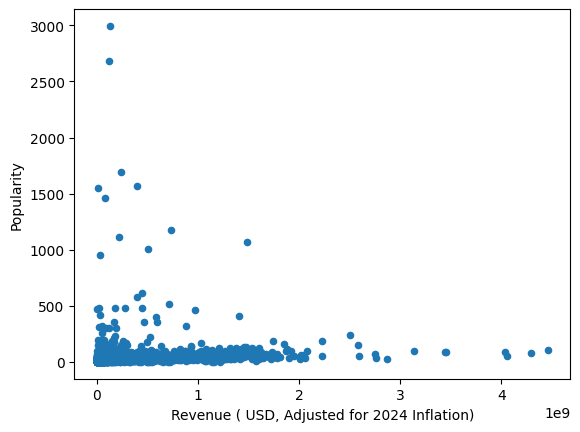

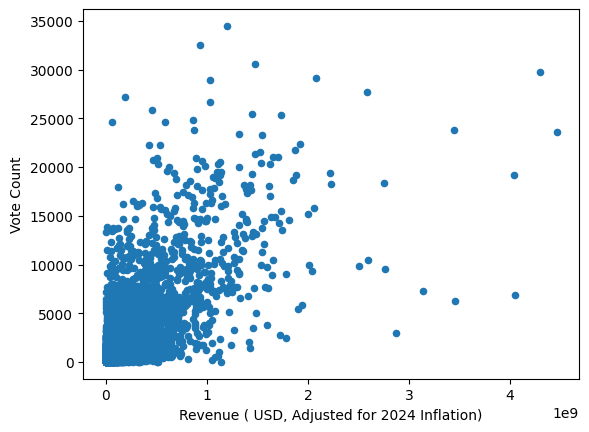

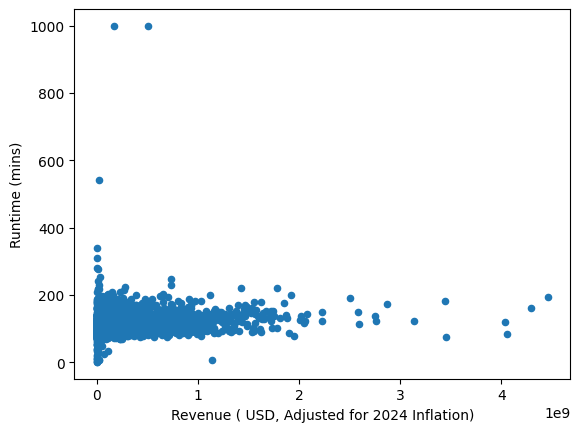

Accurcy from Random Forests Classifier: 0.8273381294964028
Vote Average: 0.101
Vote Count: 0.113
Runtime (mins): 0.123
Budget (USD, Adjusted for 2024 Inflation): 0.186
Release Year: 0.108
Popularity: 0.136
Average Rating: 0.085
IMDB Rating: 0.047
Meta Score: 0.100


In [23]:
'''
Running Random Forest Classifier
'''
datasets = load_data()
classifier = ensemble.RandomForestClassifier()
classifier.fit(datasets['X_train'], datasets['y_train'])
print(f"Accurcy from Random Forests Classifier: {classifier.score(datasets['X_test'], datasets['y_test'])}")
feature_importance = classifier.feature_importances_
numerical_features = ['Vote Average', 
                          'Vote Count', 
                          'Runtime (mins)', 
                          'Budget (USD, Adjusted for 2024 Inflation)', 
                          'Release Year', 
                          'Popularity', 
                          'Average Rating', 
                          'IMDB Rating', 
                          'Meta Score', 
                          'Revenue Class']
for (feature, importance) in zip(numerical_features[:-1], feature_importance):
    print(f"{feature}: {importance:.3f}")
# print(f"These are the important features from RF:{}")